<a href="https://www.kaggle.com/code/muhammadivanaldorino/clustering-songs-with-k-means-audio-profile?scriptVersionId=223108865" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

### Import Libraries

In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/spotify-dataset/cleaned_dataset.csv


### Opening the Dataset

In [4]:
df = pd.read_csv('/kaggle/input/spotify-dataset/cleaned_dataset.csv')
df.head()

,Artist,Track,Album,Album_type,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,...,Title,Channel,Views,Likes,Comments,Licensed,official_video,Stream,EnergyLiveness,most_playedon
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,-6.679,0.1770,0.008360,0.002330,...,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,True,True,1.040235e+09,1.150082,Spotify
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,-5.815,0.0302,0.086900,0.000687,...,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,True,True,3.100837e+08,15.183585,Spotify
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.695,0.923,-3.930,0.0522,0.042500,0.046900,...,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,True,True,6.306347e+07,7.956897,Spotify
3,Gorillaz,On Melancholy Hill,Plastic Beach,album,0.689,0.739,-5.810,0.0260,0.000015,0.509000,...,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,True,True,4.346636e+08,11.546875,Spotify
4,Gorillaz,Clint Eastwood,Gorillaz,album,0.663,0.694,-8.627,0.1710,0.025300,0.000000,...,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,True,True,6.172597e+08,9.942693,Youtube


### Preprocessing data

In [5]:
#select only some of the useful column
features = [
    "Danceability", "Energy", "Loudness", "Speechiness", "Acousticness",
    "Instrumentalness", "Liveness", "Valence", "Tempo", "Duration_min"
]

In [6]:
df["Album_type"].unique()


array(['album', 'single', 'compilation'], dtype=object)

In [7]:
#limit to single only and drop missing value
df_clean = df[df['Album_type'] == 'single'][features].dropna()


In [8]:
df_clean.head()

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_min
2,0.695,0.923,-3.930,0.0522,0.042500,0.046900,0.116,0.551,108.014,3.585833
6,0.716,0.897,-7.185,0.0629,0.012000,0.262000,0.325,0.358,127.030,4.569033
8,0.741,0.913,-3.340,0.0465,0.003430,0.103000,0.325,0.643,120.012,3.562500
29,0.545,0.640,-3.529,0.3080,0.368000,0.000000,0.111,0.574,181.733,4.241550
37,0.386,0.996,-2.960,0.0754,0.000012,0.000836,0.116,0.188,130.573,3.428000


### Finding optimal number of clusters (w/ Elbow Method)

In [9]:
#standarize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_clean)

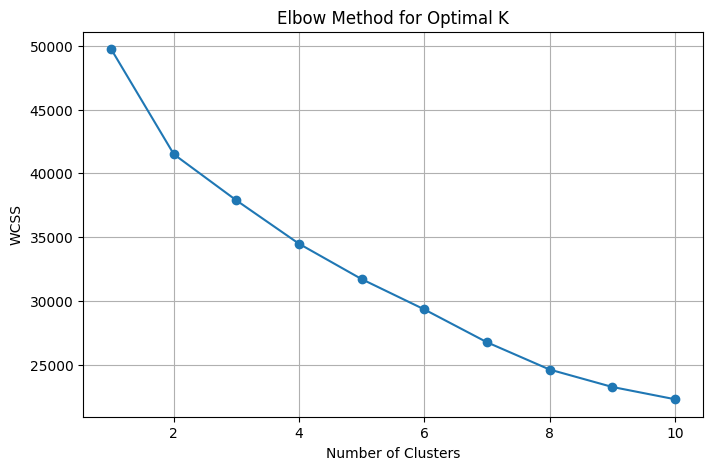

In [10]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

### Applying k-means clustering

In [11]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_clean['Cluster'] = kmeans.fit_predict(scaled_features)

In [12]:
df['Cluster'] = df_clean['Cluster']

In [13]:
cluster_summary = df_clean.groupby('Cluster').mean()
pd.DataFrame(cluster_summary)

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_min
Cluster,,,,,,,,,,
0,0.733224,0.643785,-6.658528,0.296724,0.249808,0.005064,0.150199,0.559503,130.174439,3.454783
1,0.550598,0.455508,-8.979697,0.054738,0.550969,0.011512,0.151837,0.364160,112.999457,3.879384
2,0.706705,0.745328,-5.332731,0.074407,0.160750,0.013836,0.148359,0.594937,120.863176,3.385500
3,0.616449,0.785651,-5.109060,0.100472,0.204036,0.015617,0.561185,0.555484,125.890436,3.380338
4,0.565882,0.513862,-12.727216,0.065075,0.420820,0.764250,0.156582,0.329379,123.713284,3.163883


### Result

In [14]:
df[df['Cluster'].notna()][['Artist', 'Track', 'Album', 'Cluster']]


,Artist,Track,Album,Cluster
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),2.0
6,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown) ...,New Gold (feat. Tame Impala and Bootie Brown) ...,2.0
8,Gorillaz,Cracker Island (feat. Thundercat),Cracker Island (feat. Thundercat),2.0
29,50 Cent,Best Friend - Remix,Best Friend (Remix),0.0
37,Metallica,Lux Æterna,Lux Æterna,2.0
...,...,...,...,...
20589,SICK LEGEND,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,2.0
20590,SICK LEGEND,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,2.0
20591,SICK LEGEND,OUTSIDE HARDSTYLE SPED UP,OUTSIDE HARDSTYLE SPED UP,2.0
20592,SICK LEGEND,ONLY GIRL HARDSTYLE,ONLY GIRL HARDSTYLE,0.0


#### Audio Profile 1

In [15]:
df[df['Cluster'] == 0][['Artist', 'Track', 'Album', 'Cluster']]


,Artist,Track,Album,Cluster
29,50 Cent,Best Friend - Remix,Best Friend (Remix),0.0
152,Shakira,Te Felicito,Te Felicito,0.0
238,Snoop Dogg,Qué Maldición,Qué Maldición,0.0
257,Sia,Unstoppable - R3HAB Remix,Unstoppable (R3HAB Remix),0.0
294,Tiësto,The Business,The Business,0.0
...,...,...,...,...
20486,Shubh,Baller,Baller,0.0
20490,Shubh,Offshore,Offshore,0.0
20504,IVE,My Satisfaction,After LIKE,0.0
20554,Grupo Frontera,La Ladrona - En Vivo,"En Vivo, Vol.1",0.0


#### Audio Profile 2

In [16]:
df[df['Cluster'] == 1][['Artist', 'Track', 'Album', 'Cluster']]


,Artist,Track,Album,Cluster
140,Khalid,lovely (with Khalid),lovely (with Khalid),1.0
357,Beyoncé,Perfect Duet (Ed Sheeran & Beyoncé),Perfect Duet (Ed Sheeran & Beyoncé),1.0
374,Don Toliver,Do It Right,Do It Right,1.0
419,Disney,"All I Want - From ""High School Musical: The Mu...","All I Want (From ""High School Musical: The Mus...",1.0
445,Tory Lanez,In For It,In For It,1.0
...,...,...,...,...
20551,Grupo Frontera,911 - En Vivo,911 (En Vivo),1.0
20557,Grupo Frontera,La Pareja Ideal - En Vivo,"En Vivo, Vol.1",1.0
20561,Jung Kook,Left and Right (Feat. Jung Kook of BTS) - Acap...,Left and Right (Feat. Jung Kook of BTS),1.0
20581,ThxSoMch,ONLY NEED MY BABY! (SMOAGT),ONLY NEED MY BABY! (SMOAGT),1.0


#### Audio Profile 3

In [17]:
df[df['Cluster'] == 2][['Artist', 'Track', 'Album', 'Cluster']]


,Artist,Track,Album,Cluster
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),2.0
6,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown) ...,New Gold (feat. Tame Impala and Bootie Brown) ...,2.0
8,Gorillaz,Cracker Island (feat. Thundercat),Cracker Island (feat. Thundercat),2.0
37,Metallica,Lux Æterna,Lux Æterna,2.0
39,Metallica,Screaming Suicide,Screaming Suicide,2.0
...,...,...,...,...
20586,SICK LEGEND,PART OF ME HARDSTYLE,PART OF ME HARDSTYLE,2.0
20588,SICK LEGEND,EVERYTIME WE TOUCH HARDSTYLE (SPED UP),EVERYTIME WE TOUCH HARDSTYLE (SPED UP),2.0
20589,SICK LEGEND,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,2.0
20590,SICK LEGEND,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,2.0


#### Audio Profile 4

In [18]:
df[df['Cluster'] == 3][['Artist', 'Track', 'Album', 'Cluster']]


,Artist,Track,Album,Cluster
63,Linkin Park,Numb / Encore,Numb / Encore: MTV Ultimate Mash-Ups Presents ...,3.0
96,Black Eyed Peas,Pump It Louder,Pump It Louder,3.0
233,Snoop Dogg,"That's My N**** (with Meek Mill, YG & Snoop Dogg)","That's My N**** (with Meek Mill, YG & Snoop Do...",3.0
241,Lil Wayne,"Sucker for Pain (with Wiz Khalifa, Imagine Dra...",Sucker for Pain (with Logic & Ty Dolla $ign fe...,3.0
293,Tiësto,Lay Low,Lay Low,3.0
...,...,...,...,...
20570,LE SSERAFIM,Good Parts (when the quality is bad but I am),ANTIFRAGILE,3.0
20576,ThxSoMch,Keep It Tucked,Keep It Tucked,3.0
20584,SICK LEGEND,PART OF ME HARDSTYLE (SPED UP),PART OF ME HARDSTYLE (SPED UP),3.0
20585,SICK LEGEND,SUMMER TIME SADNESS HARDSTYLE,SUMMER TIME SADNESS HARDSTYLE,3.0


### Save As CSV


In [19]:
df.to_csv("cleaned_dataset_clustered.csv", index=False)
